In [10]:
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df=pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
print(df.head())
df.describe()

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [18]:
df_standard = (df - df.mean(axis=0))/ df.std(axis=0)

print(df_standard.mean())
df_standard.std()

# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# data = StandardScaler()
# df_std= data.fit_transform(df)
# x_std = pd.DataFrame(df_std , columns= df.columns)
# x_std.std(ddof=0)
# x_std.mean()


age   -7.284269e-17
sex    1.723106e-16
bmi   -3.114653e-17
bp    -7.284269e-17
s1    -1.406617e-17
s2     5.475761e-17
s3    -4.822688e-17
s4     2.185281e-16
s5    -7.736396e-17
s6    -6.185349e-17
dtype: float64


age    1.0
sex    1.0
bmi    1.0
bp     1.0
s1     1.0
s2     1.0
s3     1.0
s4     1.0
s5     1.0
s6     1.0
dtype: float64

In [62]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_standard)


PCA()

In [55]:
explained_var =pca.explained_variance_
explained_var 

#(EV) raw variance pc1,pc2,...


array([4.02421075, 1.49231968, 1.20596626, 0.9554764 , 0.66218139,
       0.60271708, 0.53656565, 0.43368204, 0.07832002, 0.00856073])

In [ ]:
explained_ratio= pca.explained_variance_ratio_
explained_ratio
#(EVR) % kole variance

array([0.40242108, 0.14923197, 0.12059663, 0.09554764, 0.06621814,
       0.06027171, 0.05365657, 0.0433682 , 0.007832  , 0.00085607])

In [67]:
import numpy as np
cumulative_ratio = np.cumsum(explained_ratio)
cumulative_ratio

# (CEVR)camulate 0.42 ---> jam 42%-->+14 56%

array([0.40242108, 0.55165304, 0.67224967, 0.76779731, 0.83401545,
       0.89428716, 0.94794372, 0.99131192, 0.99914393, 1.        ])

In [ ]:
pce_frame = pd.DataFrame({
    "explained_var": explained_var,
    "explained_ratio": explained_ratio,
    "cumulatve_ratio": cumulative_ratio
})

pce_frame

,explained_var,explained_ratio,cumulatve_ratio
0,4.024211,0.402421,0.402421
1,1.492320,0.149232,0.551653
2,1.205966,0.120597,0.672250
3,0.955476,0.095548,0.767797
4,0.662181,0.066218,0.834015
5,0.602717,0.060272,0.894287
6,0.536566,0.053657,0.947944
7,0.433682,0.043368,0.991312
8,0.078320,0.007832,0.999144
9,0.008561,0.000856,1.000000


In [ ]:
n_80 = np.argmax(cumulative_ratio >= 0.80)+1
n_90=  np.argmax(cumulative_ratio >= 0.90)+1
n_80


5

4 component--->76
5 component--->83
7 component---> 94 var poshsh
برای فشرده سازی داده به 80 اطلاعات 5 مولفه لازمه

In [ ]:
components = pca.components_
components.shape
# matris pcs
num_pc = components.shape[0]
pc_names = ["pc" + str(i+1) for i in range(num_pc)]
loading = pd.DataFrame(components, columns=df_standard.columns , index=pc_names)
loading

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
pc1,0.216431,0.186967,0.303162,0.271738,0.343255,0.351861,-0.282437,0.428834,0.378618,0.322183
pc2,0.044367,-0.386547,-0.156281,-0.138266,0.573027,0.455942,0.506239,-0.068181,-0.026187,-0.084949
pc3,0.494668,-0.106864,0.167527,0.513571,-0.068579,-0.269689,0.386032,-0.380680,0.063630,0.276842
pc4,0.414012,0.679860,-0.499825,0.019662,0.068396,0.167774,0.076020,-0.007921,-0.264427,-0.087085
pc5,0.686876,-0.373464,-0.129333,-0.486874,-0.129180,-0.116722,-0.245001,0.143646,0.151639,-0.031423
pc6,-0.225815,0.041705,-0.403151,-0.272783,0.005398,-0.133262,0.106354,-0.033936,0.178731,0.805066
pc7,-0.109530,-0.067622,-0.519874,0.320655,0.073644,-0.230535,-0.007548,0.071244,0.647302,-0.357267
pc8,-0.014937,-0.442933,-0.392922,0.477360,-0.129411,0.191325,-0.324635,0.180587,-0.449684,0.166608
pc9,0.008100,-0.002106,0.042377,0.027194,-0.042038,-0.359316,0.481247,0.773817,-0.189460,-0.015274
pc10,0.003263,0.003660,0.008247,-0.003222,0.709775,-0.563195,-0.317445,-0.090596,-0.264466,0.002611


In [ ]:
pc1 = loading.loc["pc1"].sort_values(key=np.abs , ascending=False)
# pc1*features
pc2 = loading.loc["pc2"].sort_values(key=np.abs , ascending=False)
print('top fatures in pc1:\n' , pc1.head(3))
print('top fatures in pc2:\n' , pc2.head(3))

top fatures in pc1:
 s4    0.428834
s5    0.378618
s2    0.351861
Name: pc1, dtype: float64
top fatures in pc2:
 s1    0.573027
s3    0.506239
s2    0.455942
Name: pc2, dtype: float64


شاخص های آزمایشگاهی خون(ترکیب خطی از چند شاخص خونی)


loading matrix-->satr=pca, sotoon= features
abs.features

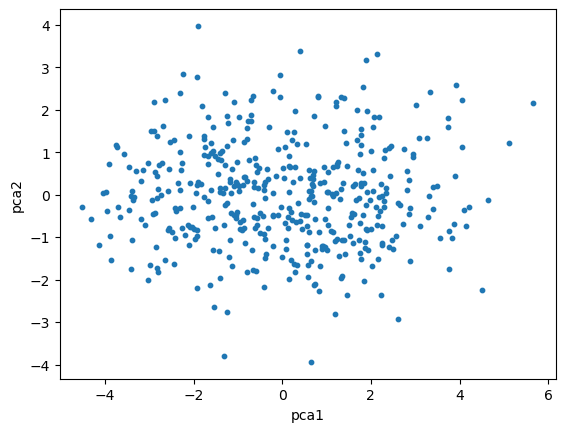

In [66]:
import matplotlib.pyplot as plt
fitpca = pca.transform(df_standard)
pca1=fitpca[:, 0]
pca2= fitpca[:, 1]
plt.scatter(pca1, pca2, s=10)
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

pc1 max var data
baraye tafkik kafi nist
